<a href="https://colab.research.google.com/github/chaitanyabalajireddy/NLP-Projects/blob/main/SE23MAID007_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Word2Vec with Skip-Gram and Negative Sampling using Gensim**

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import multiprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    """Clean text by lowering case, removing punctuation and stopwords, then tokenize."""
    text = text.lower()  # Lowercase text
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [w for w in tokens if not w in stop_words]  # Remove stopwords
    return tokens

# Load CSV file
csv_file_path = '/content/train_data.csv'
df = pd.read_csv(csv_file_path)

# Assuming the text data is in a column named 'text'
# Adjust the column name as needed
texts = df['text'].dropna().apply(clean_and_tokenize)


# Convert DataFrame series to list of lists (sentences) for Word2Vec
sentences = texts.tolist()

# Initialize and train the Word2Vec model with Skip-Gram and Negative Sampling
model = Word2Vec(sentences=sentences,
                 vector_size=100,  # Dimensionality of the word vectors
                 window=5,         # Max distance between current and predicted word
                 min_count=2,      # Ignores words with total frequency lower than this
                 workers=multiprocessing.cpu_count(),  # Use these many worker threads to train the model
                 sg=1,             # Skip-gram model
                 hs=0,             # Negative sampling
                 negative=10)      # Number of negative samples

# Save the model
model.save("word2vec.model")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **FastText Model using Gensim**

In [2]:
from gensim.models import FastText
import multiprocessing

# Initialize and train the FastText model with the preprocessed and tokenized sentences
# Assuming 'sentences' is already defined and contains the tokenized sentences from your CSV data
fasttext_model = FastText(sentences=sentences,
                          vector_size=100,  # Dimensionality of the word vectors
                          window=5,         # Max distance between the current and predicted word
                          min_count=2,      # Ignores words with total frequency lower than this
                          workers=multiprocessing.cpu_count(),  # Use these many worker threads to train the model
                          sg=1,  # Skip-gram model
                          hs=0,  # Negative sampling
                          negative=10)      # Number of negative samples

# Save the model to disk
fasttext_model.save("fasttext.model")


# **Building RNN, Loading pretrained models & Testing**

Epoch 1/10
782/782 [==============================] - 21s 21ms/step - loss: 0.3961 - accuracy: 0.8217 - precision: 0.8152 - recall: 0.8321 - auc: 0.9024 - val_loss: 0.3419 - val_accuracy: 0.8484 - val_precision: 0.8065 - val_recall: 0.9166 - val_auc: 0.9342
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3305 - accuracy: 0.8594 - precision: 0.8580 - recall: 0.8615 - auc: 0.9329 - val_loss: 0.3208 - val_accuracy: 0.8611 - val_precision: 0.9013 - val_recall: 0.8110 - val_auc: 0.9430
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3031 - accuracy: 0.8678 - precision: 0.8645 - recall: 0.8723 - auc: 0.9437 - val_loss: 0.3021 - val_accuracy: 0.8718 - val_precision: 0.8817 - val_recall: 0.8590 - val_auc: 0.9468
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2869 - accuracy: 0.8808 - precision: 0.8768 - recall: 0.8861 - auc: 0.9496 - val_loss: 0.2821 - val_accuracy: 0.8794 - val_precision: 0.8711 - val_r

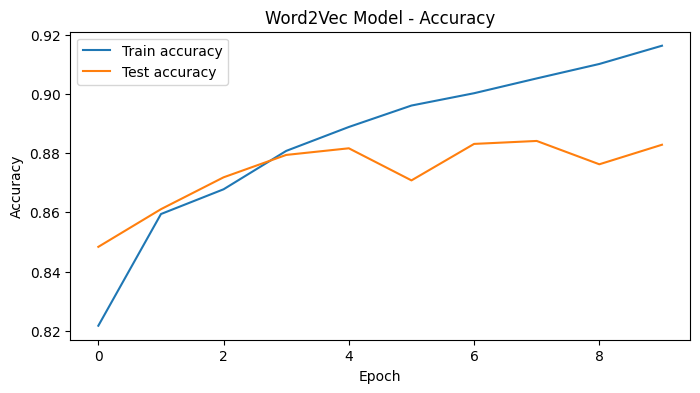

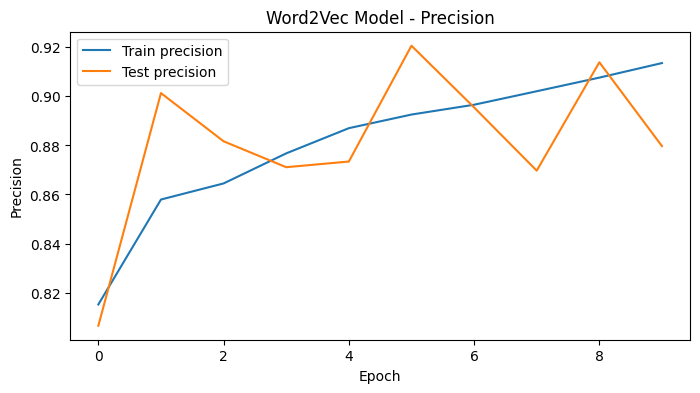

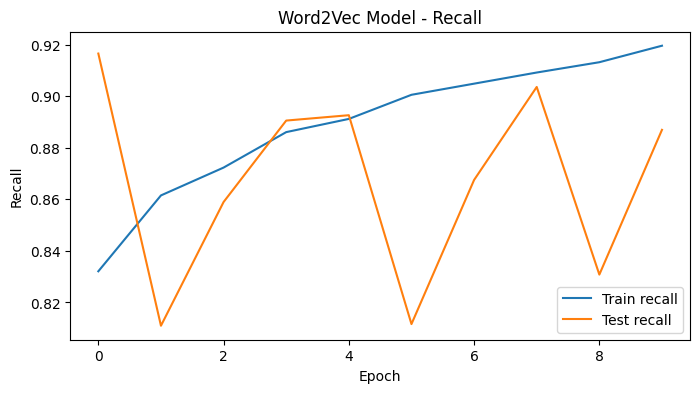

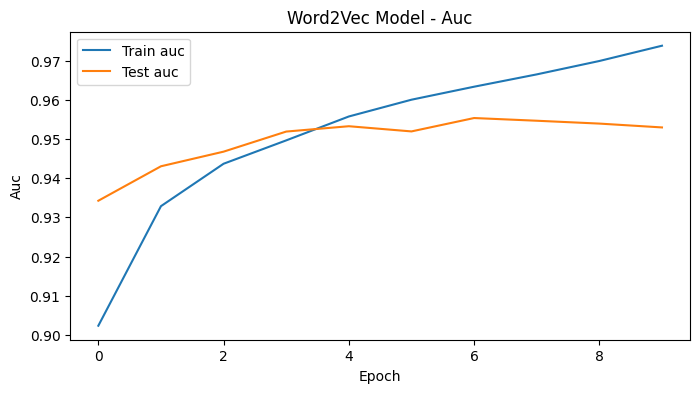

Epoch 1/10
782/782 [==============================] - 20s 21ms/step - loss: 0.4095 - accuracy: 0.8178 - precision: 0.8103 - recall: 0.8299 - auc: 0.8951 - val_loss: 0.4191 - val_accuracy: 0.8082 - val_precision: 0.9243 - val_recall: 0.6714 - val_auc: 0.9246
Epoch 2/10
782/782 [==============================] - 16s 20ms/step - loss: 0.3361 - accuracy: 0.8571 - precision: 0.8532 - recall: 0.8626 - auc: 0.9305 - val_loss: 0.3597 - val_accuracy: 0.8509 - val_precision: 0.9087 - val_recall: 0.7802 - val_auc: 0.9380
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 0.3147 - accuracy: 0.8669 - precision: 0.8636 - recall: 0.8714 - auc: 0.9393 - val_loss: 0.4007 - val_accuracy: 0.8161 - val_precision: 0.9427 - val_recall: 0.6731 - val_auc: 0.9427
Epoch 4/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2913 - accuracy: 0.8784 - precision: 0.8745 - recall: 0.8835 - auc: 0.9481 - val_loss: 0.2953 - val_accuracy: 0.8770 - val_precision: 0.8555 - val_r

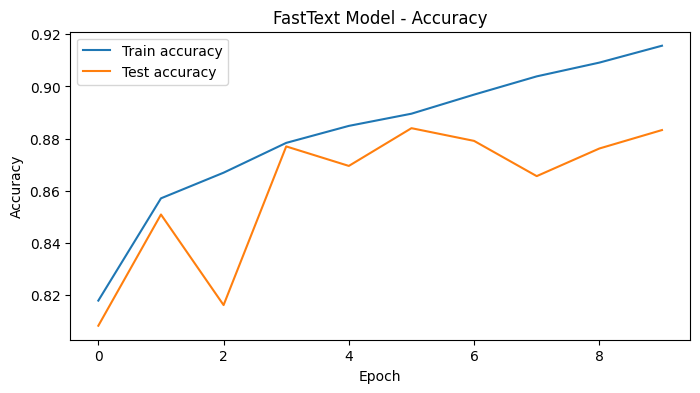

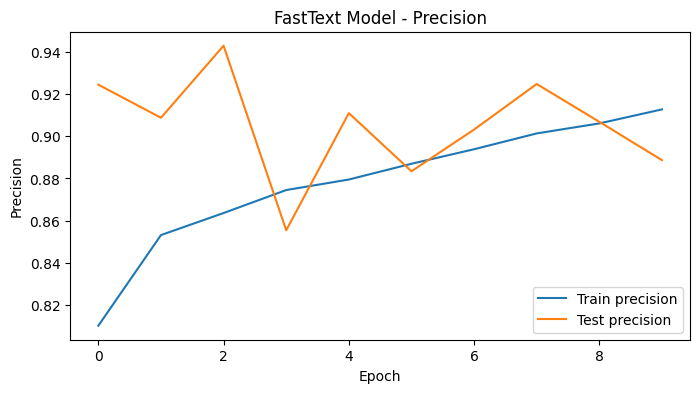

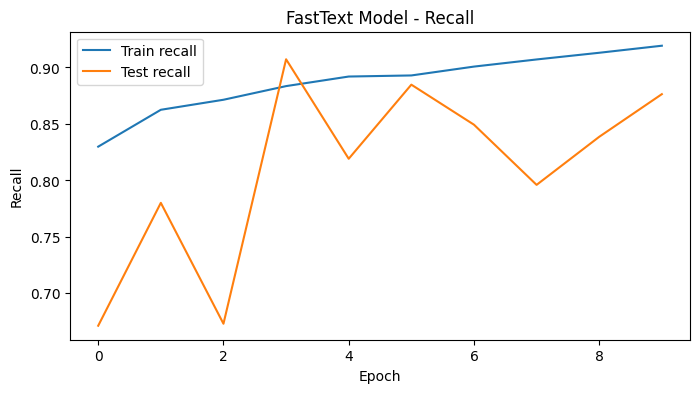

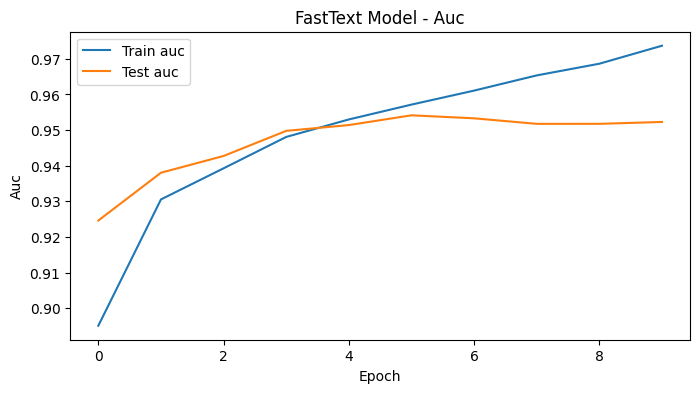

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, FastText
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

# Function to clean and tokenize text
def clean_and_tokenize(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return [w for w in tokens if not w in stop_words]

# Function to prepare the embedding matrix
def get_embedding_matrix(pretrained_model, word_index, embedding_dim=100):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        if word in pretrained_model.wv:
            embedding_matrix[i] = pretrained_model.wv[word]
    return embedding_matrix

# Function to build and train RNN model, evaluate it, and plot metrics
def build_and_evaluate_rnn(model_name, embedding_matrix, train_padded, train_labels, test_padded, test_labels, epochs=10):
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]

    model = Sequential([
        Embedding(len(word_index) + 1, embedding_matrix.shape[1], weights=[embedding_matrix], input_length=100, trainable=False),
        Bidirectional(LSTM(64)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

    history = model.fit(train_padded, train_labels, epochs=epochs, validation_data=(test_padded, test_labels))

    # Plotting metrics
    for metric in ['accuracy', 'precision', 'recall', 'auc']:
        plt.figure(figsize=(8, 4))
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Test {metric}')
        plt.title(f'{model_name} Model - {metric.capitalize()}')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.show()

# Assuming datasets are already loaded
train_df = pd.read_csv('/content/train_data.csv')  # Update path
test_df = pd.read_csv('/content/test_data.csv')    # Update path

# Preprocessing texts
train_df['text_cleaned'] = train_df['text'].apply(clean_and_tokenize)
test_df['text_cleaned'] = test_df['text'].apply(clean_and_tokenize)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([train_df['text_cleaned'], test_df['text_cleaned']]))
word_index = tokenizer.word_index

# Sequence padding
train_sequences = tokenizer.texts_to_sequences(train_df['text_cleaned'])
train_padded = pad_sequences(train_sequences, maxlen=100)
test_sequences = tokenizer.texts_to_sequences(test_df['text_cleaned'])
test_padded = pad_sequences(test_sequences, maxlen=100)

# Converting labels
train_labels = np.array(train_df['label'].map({'pos': 1, 'neg': 0}), dtype='float32').reshape(-1, 1)
test_labels = np.array(test_df['label'].map({'pos': 1, 'neg': 0}), dtype='float32').reshape(-1, 1)

# Load pretrained Word2Vec and FastText models
word2vec_model = Word2Vec.load("/content/word2vec.model")
fasttext_model = FastText.load("/content/fasttext.model")

# Get embedding matrices
w2v_embedding_matrix = get_embedding_matrix(word2vec_model, word_index, embedding_dim=100)
ft_embedding_matrix = get_embedding_matrix(fasttext_model, word_index, embedding_dim=100)

# Train and evaluate with Word2Vec embeddings
build_and_evaluate_rnn("Word2Vec", w2v_embedding_matrix, train_padded, train_labels, test_padded, test_labels, epochs=10)

# Train and evaluate with FastText embeddings
build_and_evaluate_rnn("FastText", ft_embedding_matrix, train_padded, train_labels, test_padded, test_labels, epochs=10)
